# Exploratory Data Analyst of Companies Stock Prices

This dataset contains historical daily stock data for five major U.S. companies—Microsoft (MSFT), Exxon Mobil (XOM), JPMorgan Chase (JPM), Johnson & Johnson (JNJ), and Procter & Gamble (PG)—covering the period from 2000 to 2025. Each record represents a single trading day and includes key market indicators such as the opening price, highest and lowest prices of the day, closing price, and trading volume. Additionally, the dataset tracks any dividend payments and stock splits that occurred on each date. A ticker symbol is provided to identify the company associated with each entry. This time-series data is suitable for analyzing long-term financial trends, evaluating company performance, and modeling market behavior across two and a half decades

### Columns:
- **Date:** The specific trading date (includes timezone).
- **Open:**	The stock price at the opening of the trading day.
- **High:**	The highest stock price reached during the day.
- **Low:** The lowest stock price during the trading day.
- **Close:** The final stock price at the market close.
- **Volume:** The number of shares traded on that day.
- **Dividends:** The cash dividends paid per share on that day (if any).
- **Stock Splits:**	Indicates any split factor (e.g., 2.0 = 2-for-1 split on that date).
- **Ticker:** The stock’s symbol—in this case, MSFT for Microsoft.

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [5]:
stocks_df = pd.read_csv('../Data/Original/companies_stock_prices.csv')
stocks_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,1999-06-18 00:00:00-04:00,25.229005,26.052731,25.171535,26.052731,69116200,0.0,0.0,MSFT
1,1999-06-21 00:00:00-04:00,26.014408,27.278731,26.014408,27.259575,56194400,0.0,0.0,MSFT
2,1999-06-22 00:00:00-04:00,27.106340,27.106340,26.435866,26.512491,38751000,0.0,0.0,MSFT
3,1999-06-23 00:00:00-04:00,26.340076,26.780673,26.071886,26.359232,33942000,0.0,0.0,MSFT
4,1999-06-24 00:00:00-04:00,26.282600,26.435851,25.746220,25.937784,33559000,0.0,0.0,MSFT


### Structure of Dataset

In [6]:
#Size of Dataset
stocks_df.shape

(32675, 9)

In [7]:
#Type of variables
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32675 entries, 0 to 32674
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          32675 non-null  object 
 1   Open          32675 non-null  float64
 2   High          32675 non-null  float64
 3   Low           32675 non-null  float64
 4   Close         32675 non-null  float64
 5   Volume        32675 non-null  int64  
 6   Dividends     32675 non-null  float64
 7   Stock Splits  32675 non-null  float64
 8   Ticker        32675 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 2.2+ MB


In [8]:
stocks_df['Ticker'].unique()

array(['MSFT', 'XOM', 'JPM', 'JNJ', 'PG'], dtype=object)

In [13]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'], errors='coerce')
stocks_df['Date'] = stocks_df['Date'].dt.date
stocks_df['Date'].head(2)

### MSFT Analysis

In [16]:
MSFT_df = stocks_df[stocks_df['Ticker'] == 'MSFT']
MSFT_df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,1999-06-18,25.229005,26.052731,25.171535,26.052731,69116200,0.0,0.0,MSFT
1,1999-06-21,26.014408,27.278731,26.014408,27.259575,56194400,0.0,0.0,MSFT
2,1999-06-22,27.106340,27.106340,26.435866,26.512491,38751000,0.0,0.0,MSFT


In [20]:
MSFT_df.shape

(4151, 9)

In [21]:
MSFT_df = MSFT_df.dropna(subset=['Date'])
print("Oldst Date: ", MSFT_df['Date'].min())
print("Recent Date: ", MSFT_df['Date'].max())
print("-----------------------")
print("Highest price:", MSFT_df['Close'].max())
print("Lowest price:", MSFT_df['Close'].min())

Oldst Date:  1999-06-18
Recent Date:  2025-06-10
-----------------------
Highest price: 472.75
Lowest price: 11.177742004394531


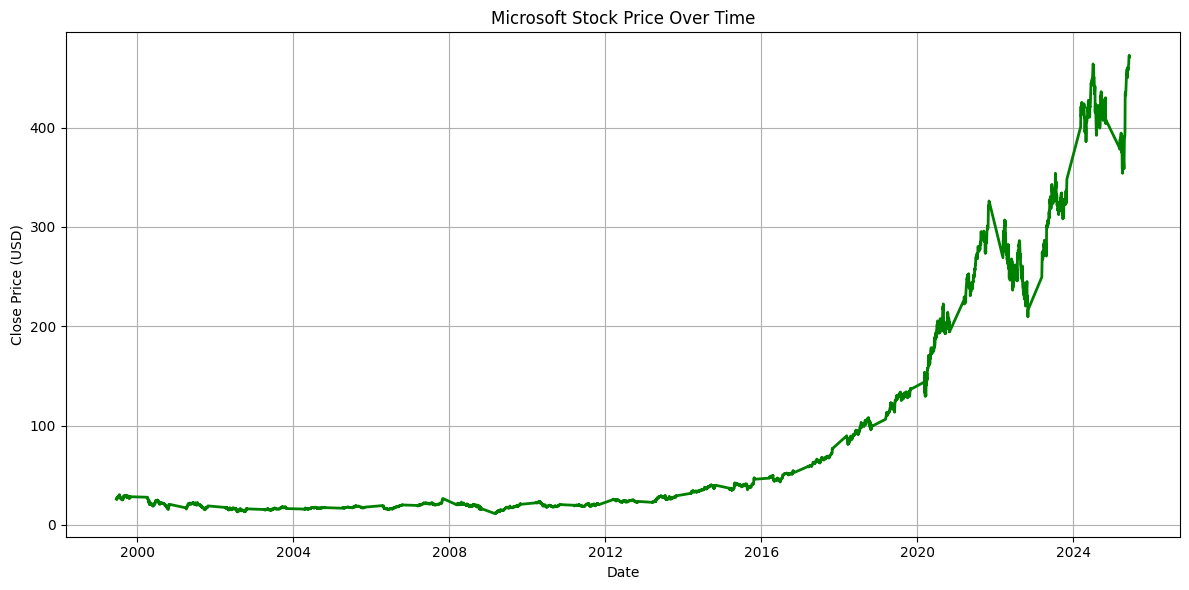

In [23]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(MSFT_df['Date'], MSFT_df['Close'], color='green', linewidth=2)
plt.title('Microsoft Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### XOM Analysis

In [24]:
XOM_df = stocks_df[stocks_df['Ticker'] == 'XOM']
XOM_df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
6535,1999-06-18,17.930917,18.222138,17.792240,17.833843,10389600,0.0,0.0,XOM
6536,1999-06-21,17.625823,17.722897,17.168190,17.362337,6741000,0.0,0.0,XOM
6537,1999-06-22,17.140456,17.279133,17.043383,17.084986,7914800,0.0,0.0,XOM


In [25]:
XOM_df = XOM_df.dropna(subset=['Date'])
print("Oldst Date: ", XOM_df['Date'].min())
print("Recent Date: ", XOM_df['Date'].max())
print("-----------------------")
print("Highest price:", XOM_df['Close'].max())
print("Lowest price:", XOM_df['Close'].min())

Oldst Date:  1999-06-18
Recent Date:  2025-06-10
-----------------------
Highest price: 122.12106323242188
Lowest price: 14.346548080444336


In [26]:
XOM_df.shape

(4151, 9)

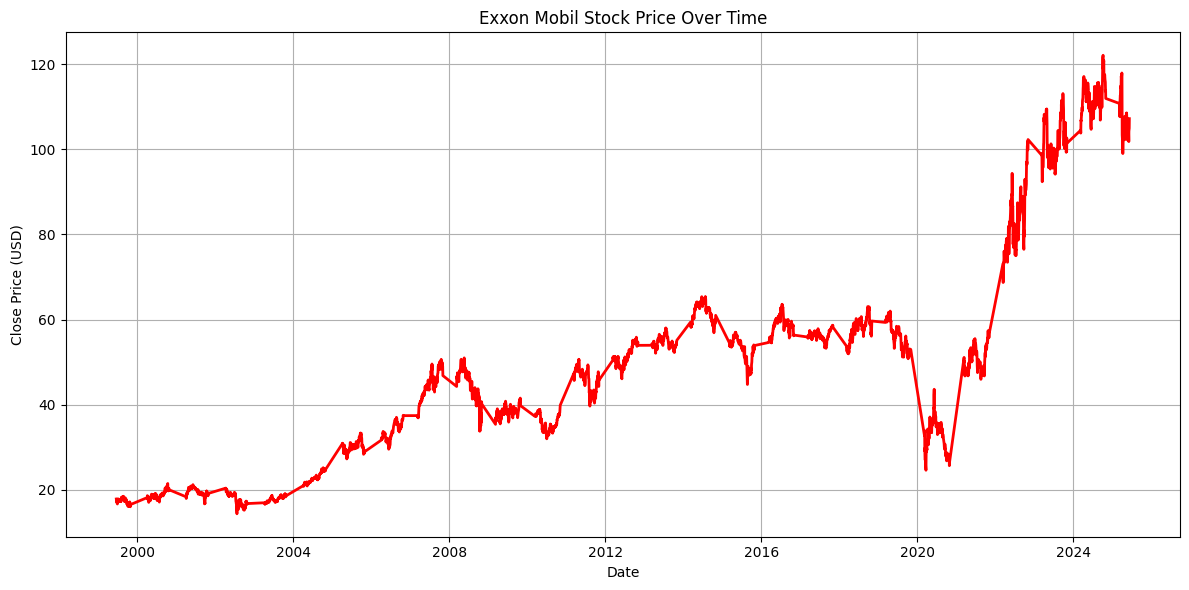

In [29]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(XOM_df['Date'], XOM_df['Close'], color='red', linewidth=2)
plt.title('Exxon Mobil Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### JPM Analysis

In [30]:
JPM_df = stocks_df[stocks_df['Ticker'] == 'JPM']
JPM_df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
13070,1999-06-18,25.129242,25.543460,25.109519,25.287041,4764150,0.0,0.0,JPM
13071,1999-06-21,25.720980,26.431068,25.563183,26.352171,4377750,0.0,0.0,JPM
13072,1999-06-22,26.352177,26.431074,25.720985,25.799885,3204750,0.0,0.0,JPM


In [31]:
JPM_df = JPM_df.dropna(subset=['Date'])
print("Oldst Date: ", JPM_df['Date'].min())
print("Recent Date: ", JPM_df['Date'].max())
print("-----------------------")
print("Highest price:", JPM_df['Close'].max())
print("Lowest price:", JPM_df['Close'].min())

Oldst Date:  1999-06-18
Recent Date:  2025-06-10
-----------------------
Highest price: 268.6000061035156
Lowest price: 8.205750465393066


In [32]:
JPM_df.shape

(4151, 9)

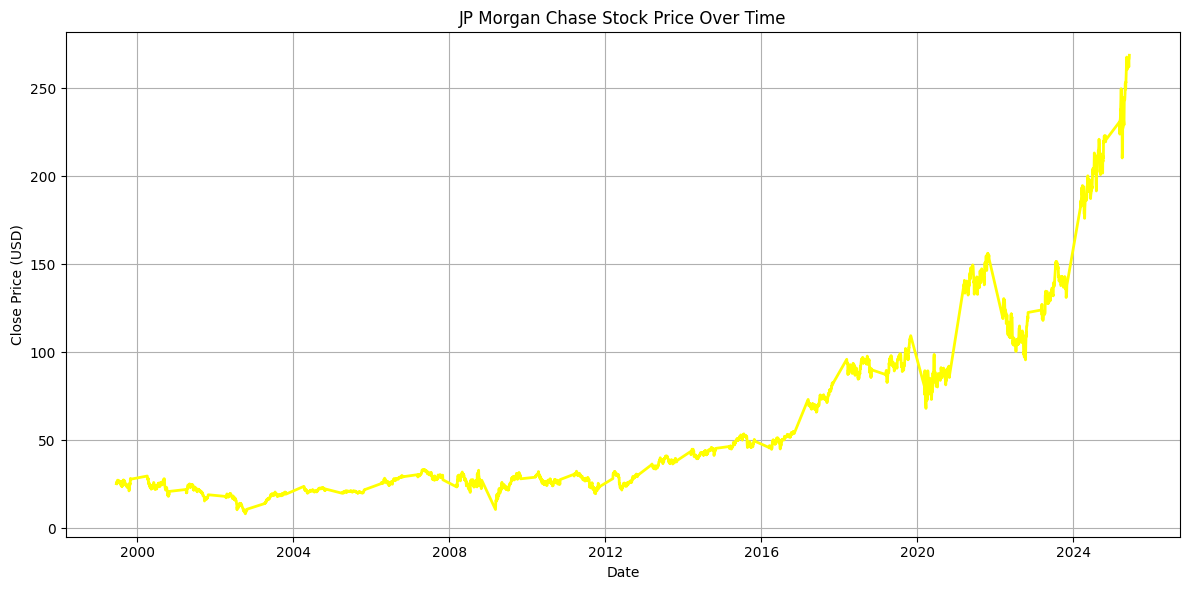

In [39]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(JPM_df['Date'], JPM_df['Close'], color='yellow', linewidth=2)
plt.title('JP Morgan Chase Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### JNJ Analysis

In [35]:
JNJ_df = stocks_df[stocks_df['Ticker'] == 'JNJ']
JNJ_df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
19605,1999-06-18,23.497584,23.657540,23.161676,23.225658,4965600,0.0,0.0,JNJ
19606,1999-06-21,23.225656,23.225656,22.985721,23.049704,2355800,0.0,0.0,JNJ
19607,1999-06-22,23.129684,23.385614,23.065701,23.241653,4191400,0.0,0.0,JNJ


In [36]:
JNJ_df = JNJ_df.dropna(subset=['Date'])
print("Oldst Date: ", JNJ_df['Date'].min())
print("Recent Date: ", JNJ_df['Date'].max())
print("-----------------------")
print("Highest price:", JNJ_df['Close'].max())
print("Lowest price:", JNJ_df['Close'].min())

Oldst Date:  1999-06-18
Recent Date:  2025-06-10
-----------------------
Highest price: 168.79647827148438
Lowest price: 18.66290664672852


In [37]:
JNJ_df.shape

(4151, 9)

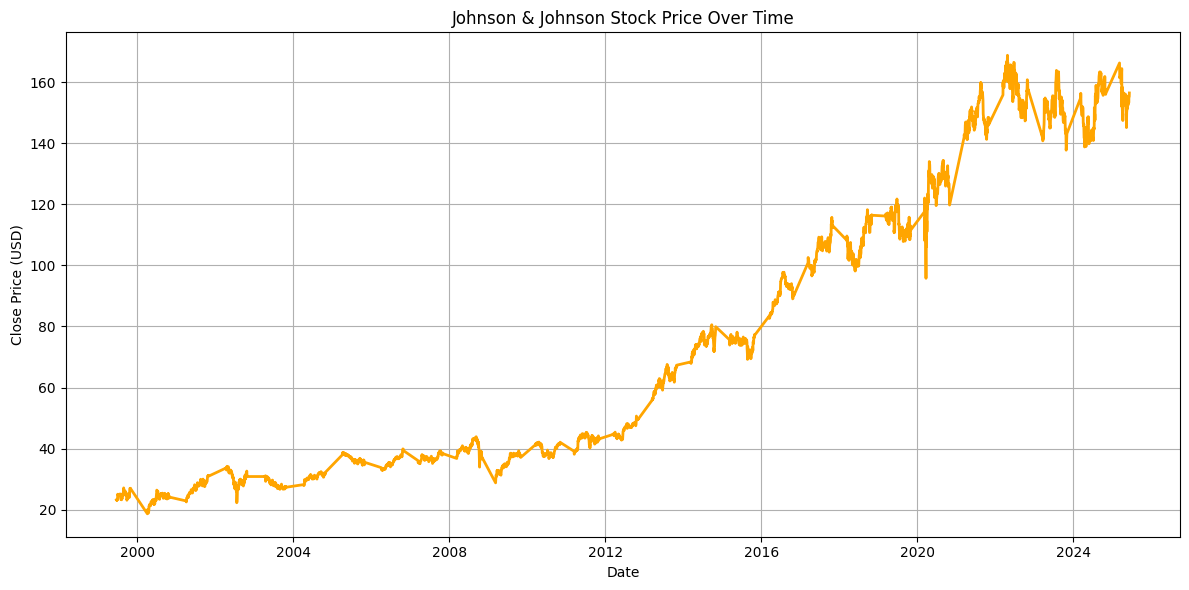

In [41]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(JNJ_df['Date'], JNJ_df['Close'], color='Orange', linewidth=2)
plt.title('Johnson & Johnson Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### PG Analysis

In [42]:
PG_df = stocks_df[stocks_df['Ticker'] == 'PG']
PG_df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
26140,1999-06-18,22.532689,22.770711,22.104251,22.318470,6994000,0.0,0.0,PG
26141,1999-06-21,22.088387,22.183596,21.786894,22.072519,3835800,0.0,0.0,PG
26142,1999-06-22,22.040795,22.183608,21.786905,21.993191,3083600,0.0,0.0,PG


In [43]:
PG_df = PG_df.dropna(subset=['Date'])
print("Oldst Date: ", PG_df['Date'].min())
print("Recent Date: ", PG_df['Date'].max())
print("-----------------------")
print("Highest price:", PG_df['Close'].max())
print("Lowest price:", PG_df['Close'].min())

Oldst Date:  1999-06-18
Recent Date:  2025-06-10
-----------------------
Highest price: 175.16812133789062
Lowest price: 13.809286117553713


In [44]:
PG_df.shape

(4151, 9)

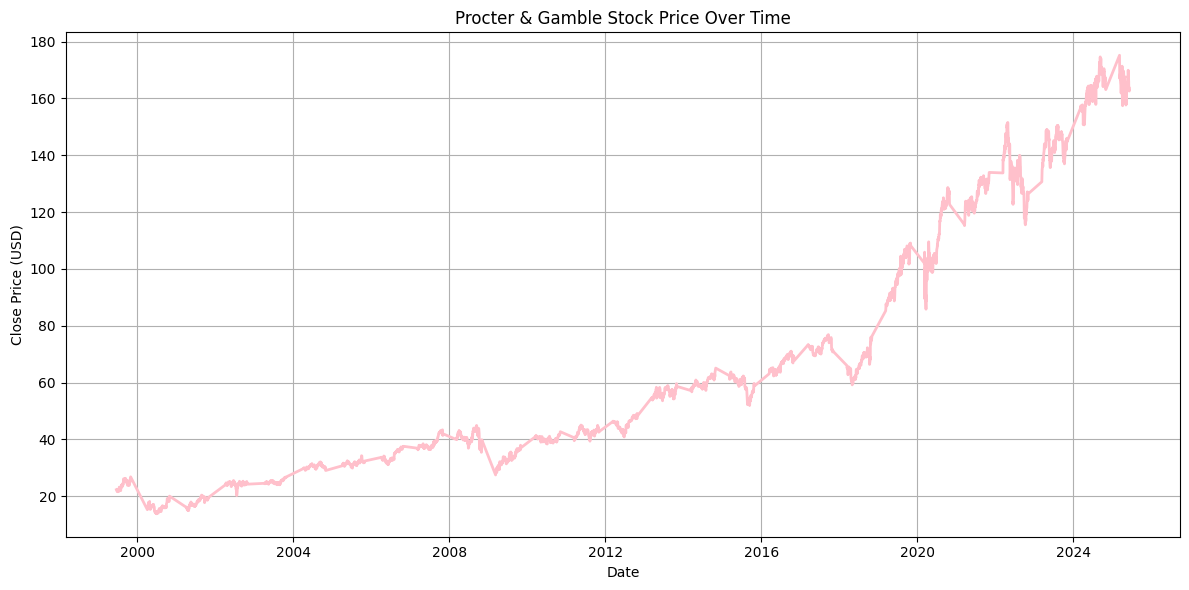

In [45]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(PG_df['Date'], PG_df['Close'], color='Pink', linewidth=2)
plt.title('Procter & Gamble Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()